In [ ]:
#Importing the necesary packages
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
PATH = 'D:/NamtaDB/'
os.listdir(PATH)

['model',
 'modelassignment2',
 'testing-a',
 'testing-all-corrected',
 'testing-auga',
 'testing-augc',
 'testing-b',
 'testing-c',
 'testing-d',
 'testing-e',
 'testing-f',
 'train',
 'training-a',
 'training-a.csv',
 'training-b',
 'training-b.csv',
 'training-c',
 'training-c.csv',
 'training-d',
 'training-d.csv',
 'training-e',
 'training-e.csv']

In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
a_csv = showRawTrainingSamples('training-a.csv')
b_csv = showRawTrainingSamples('training-b.csv')
c_csv = showRawTrainingSamples('training-c.csv')
d_csv = showRawTrainingSamples('training-d.csv')
e_csv = showRawTrainingSamples('training-e.csv')


training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-b.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-d.csv
Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')
training-e.csv
Index(['filename', 'original filename', 'districtid', 'institutionid',
       'gender', 'age', 'datestamp', 'scanid', 'digit',
       'database name original', 'database name'],
      dtype='object')


In [ ]:
#here i make a function for taking filename and digit from csv file.
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:5, :])   
  print("=============================")
  return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
b_csv = dropColumns(b_csv)
c_csv = dropColumns(c_csv)
d_csv = dropColumns(d_csv)
e_csv = dropColumns(e_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
       filename  digit
0    b00000.png      0
1    b00001.png      2
2    b00002.png      5
3    b00003.png      2
4    b00004.png      5
..          ...    ...
354  b00354.png      5
355  b00355.png      9
356  b00356.png      2
357  b00357.png      1
358  b00358.png      2

[359 rows x 2 columns]
     filename  digit
0  b00000.png      0
1  b00001.png      2
2  b00002.png      5
3  b00003.png      2
4  b00004.png      5
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png     

In [ ]:
total_csv = [a_csv,b_csv, c_csv, d_csv,e_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

72045


In [ ]:
TRAIN_PATH = 'D:/NamtaDB/trainAssignment2'
os.mkdir(TRAIN_PATH)

In [ ]:
def processImages(folder_name):
    src = PATH + folder_name + '/'
    dir_folders = os.listdir(src)
    for dir_name in dir_folders:
        file_name = os.path.join(src, dir_name)
        if os.path.isfile(file_name):
            shutil.copy(file_name, TRAIN_PATH) 

In [ ]:
processImages('training-a')
print('A Done')
processImages('training-b')
print('B Done')
processImages('training-c')
print('C Done')
processImages('training-d')
print('D Done')
processImages('training-e')
print('E Done')

A Done
B Done
C Done
D Done
E Done


In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize((28,28)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))

Trainig Samples:  72045


**For the all 4 best combination of my experiment I used Adam Optimizer.**

#Setting1
Here I Take Batch Size 200,number of hidden nodes are 100 and learning rate is 0.001.Then by using the number of epoch formula I calculate the epochs.Here for the first best output I used 4 CELU activation function with hidden layer.

In [ ]:
# Hyperparameters

batch_size = 200
num_iters = 5000
input_dim = 28*28 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 10

learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

13


In [ ]:

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:325
Test dataloader:37


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.celu_1 = nn.CELU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.celu_2 = nn.CELU()
        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.celu_3 = nn.CELU()
        
        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.celu_4 = nn.CELU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.celu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.celu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.celu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.celu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden
                              )
# To enable GPU
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (celu_1): CELU(alpha=1.0)
  (linear_2): Linear(in_features=100, out_features=100, bias=True)
  (celu_2): CELU(alpha=1.0)
  (linear_3): Linear(in_features=100, out_features=100, bias=True)
  (celu_3): CELU(alpha=1.0)
  (linear_4): Linear(in_features=100, out_features=100, bias=True)
  (celu_4): CELU(alpha=1.0)
  (linear_out): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.4863264560699463. Accuracy: 44.322598556357576
Iteration: 1000. Loss: 1.3854278326034546. Accuracy: 51.943364797334816
Iteration: 1500. Loss: 1.065168023109436. Accuracy: 61.632426429761246
Iteration: 2000. Loss: 0.9407568573951721. Accuracy: 63.686840644086615
Iteration: 2500. Loss: 0.923419713973999. Accuracy: 63.63131593559134
Iteration: 3000. Loss: 0.9482247829437256. Accuracy: 72.20988339811215
Iteration: 3500. Loss: 0.7030014991760254. Accuracy: 71.14103275957801
Iteration: 4000. Loss: 0.781063437461853. Accuracy: 74.04219877845641


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'modelassignment2/model16.pkl') 

[1.4863264560699463, 1.3854278326034546, 1.065168023109436, 0.9407568573951721, 0.923419713973999, 0.9482247829437256, 0.7030014991760254, 0.781063437461853]


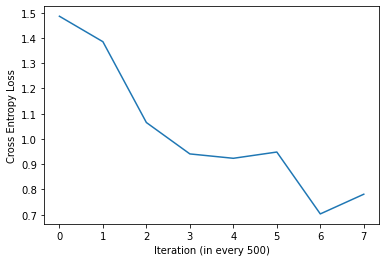

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#setting2
Here I Take Batch Size 200,number of hidden nodes are 150 and learning rate is 0.001.Then by using the number of epoch formula I calculate the epochs.
Here for the first best output I used 2 CELU activation function with hidden layer.

In [ ]:
# Hyperparameters

batch_size = 200
num_iters = 5000
input_dim = 28*28 # num_features = 784
num_hidden = 150 # num of hidden nodes
output_dim = 10

learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

13


In [ ]:

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:325
Test dataloader:37


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.celu_1 = nn.CELU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.celu_2 = nn.CELU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.celu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.celu_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=150, bias=True)
  (celu_1): CELU(alpha=1.0)
  (linear_2): Linear(in_features=150, out_features=150, bias=True)
  (celu_2): CELU(alpha=1.0)
  (linear_out): Linear(in_features=150, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.7172627449035645. Accuracy: 40.574680732926154
Iteration: 1000. Loss: 1.5083551406860352. Accuracy: 52.40144364242088
Iteration: 1500. Loss: 1.1317168474197388. Accuracy: 55.09439200444198
Iteration: 2000. Loss: 1.1056156158447266. Accuracy: 59.633536923931146
Iteration: 2500. Loss: 1.1372467279434204. Accuracy: 64.70016657412549
Iteration: 3000. Loss: 1.0591075420379639. Accuracy: 69.89172681843421
Iteration: 3500. Loss: 0.8838732242584229. Accuracy: 68.79511382565242
Iteration: 4000. Loss: 0.7958492040634155. Accuracy: 75.12493059411437


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'modelassignment2/model8.pkl') 

[1.7172627449035645, 1.5083551406860352, 1.1317168474197388, 1.1056156158447266, 1.1372467279434204, 1.0591075420379639, 0.8838732242584229, 0.7958492040634155]


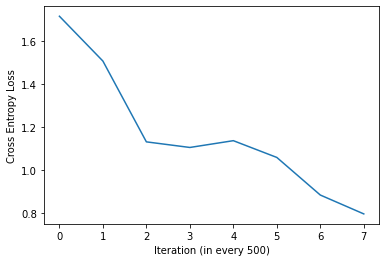

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#Setting3
Here I Take Batch Size 200,number of hidden nodes are 100 and learning rate is 0.001.Then by using the number of epoch formula I calculate the epochs.Here for the first best output I used 3 CELU activation function with hidden layer.

In [ ]:
# Hyperparameters

batch_size = 200
num_iters = 5000
input_dim = 28*28 # num_features = 784
num_hidden = 150 # num of hidden nodes
output_dim = 10
num_hidden2 = 100

learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

13


In [ ]:

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:325
Test dataloader:37


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.celu_1 = nn.CELU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.celu_2 = nn.CELU()
        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.celu_3 = nn.CELU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.celu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.celu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.celu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden
                              )
# To enable GPU
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=150, bias=True)
  (celu_1): CELU(alpha=1.0)
  (linear_2): Linear(in_features=150, out_features=150, bias=True)
  (celu_2): CELU(alpha=1.0)
  (linear_3): Linear(in_features=150, out_features=150, bias=True)
  (celu_3): CELU(alpha=1.0)
  (linear_out): Linear(in_features=150, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.7160824537277222. Accuracy: 43.19822320932815
Iteration: 1000. Loss: 1.4062119722366333. Accuracy: 52.47084952803998
Iteration: 1500. Loss: 1.0827549695968628. Accuracy: 59.74458634092171
Iteration: 2000. Loss: 1.073005199432373. Accuracy: 65.8106607440311
Iteration: 2500. Loss: 0.7954769730567932. Accuracy: 69.35036091060522
Iteration: 3000. Loss: 0.7939758896827698. Accuracy: 72.27928928373126
Iteration: 3500. Loss: 0.6670320630073547. Accuracy: 74.15324819544698
Iteration: 4000. Loss: 0.6289951801300049. Accuracy: 77.7623542476402


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'modelassignment2/model15.pkl') 

[1.7160824537277222, 1.4062119722366333, 1.0827549695968628, 1.073005199432373, 0.7954769730567932, 0.7939758896827698, 0.6670320630073547, 0.6289951801300049]


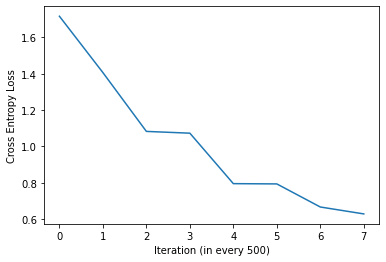

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#setting4
Here I Take Batch Size 300,number of hidden nodes are 150 and learning rate is 0.001.Then by using the number of epoch formula I calculate the epochs.Here for the first best output I used 4 CELU activation function with hidden layer.

In [ ]:
#Hyperparameters

batch_size = 300
num_iters = 5000
input_dim = 28*28 # num_features = 784
num_hidden = 150 # num of hidden nodes
output_dim = 10


learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

20


In [ ]:

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:217
Test dataloader:25


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.celu_1 = nn.CELU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.celu_2 = nn.CELU()
        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.celu_3 = nn.CELU()
        
        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.celu_4 = nn.CELU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.celu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.celu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.celu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.celu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden
                              )
# To enable GPU
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=150, bias=True)
  (celu_1): CELU(alpha=1.0)
  (linear_2): Linear(in_features=150, out_features=150, bias=True)
  (celu_2): CELU(alpha=1.0)
  (linear_3): Linear(in_features=150, out_features=150, bias=True)
  (celu_3): CELU(alpha=1.0)
  (linear_4): Linear(in_features=150, out_features=150, bias=True)
  (celu_4): CELU(alpha=1.0)
  (linear_out): Linear(in_features=150, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.4464988708496094. Accuracy: 49.81954469739034
Iteration: 1000. Loss: 1.1318670511245728. Accuracy: 55.21932259855636
Iteration: 1500. Loss: 1.0192548036575317. Accuracy: 61.57690172126596
Iteration: 2000. Loss: 0.7647405862808228. Accuracy: 69.78067740144364
Iteration: 2500. Loss: 0.8372357487678528. Accuracy: 72.80677401443643
Iteration: 3000. Loss: 0.6074962615966797. Accuracy: 73.54247640199888
Iteration: 3500. Loss: 0.569249153137207. Accuracy: 79.26152137701277
Iteration: 4000. Loss: 0.5513724684715271. Accuracy: 78.84508606329817


In [ ]:
#settings 17
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'modelassignment2/model17.pkl') 

[1.4464988708496094, 1.1318670511245728, 1.0192548036575317, 0.7647405862808228, 0.8372357487678528, 0.6074962615966797, 0.569249153137207, 0.5513724684715271]


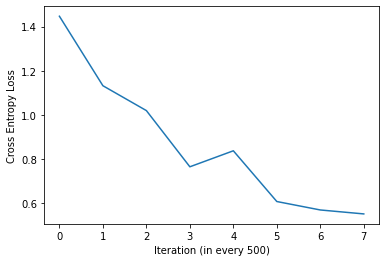

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

Here I take num_iteration 5000 for all the settings and input dimention 28*28 = 784 with output dimention 10.Also I get better result using CELU activation function.

**Settings Table:-**

| Settings| Batch Size      | num_hidden nodes |  Number Of hidden Layer           |  Accuracy(%)|
|:--------:| :----------: | : -----------:|:-----:      |:-----------:|
| 1        | 200          | 100        |  4    |  74.04    |
| 2        | 200          | 150        |  2    |  75.12  |
| 3        | 200          | 150        |  3   |  77.76     |
| 4        | 300          | 150        |  4   |  78.84     |


From the table it can be seen that I got the highst accuracy for the NamtaDB dataset is 78.84 for the setting 4.So if I increase the batch size and number of hidden nodes and also the layer then for this dataset I get better result.

Here I show the loss curves from setting 1 to 4 respectively.


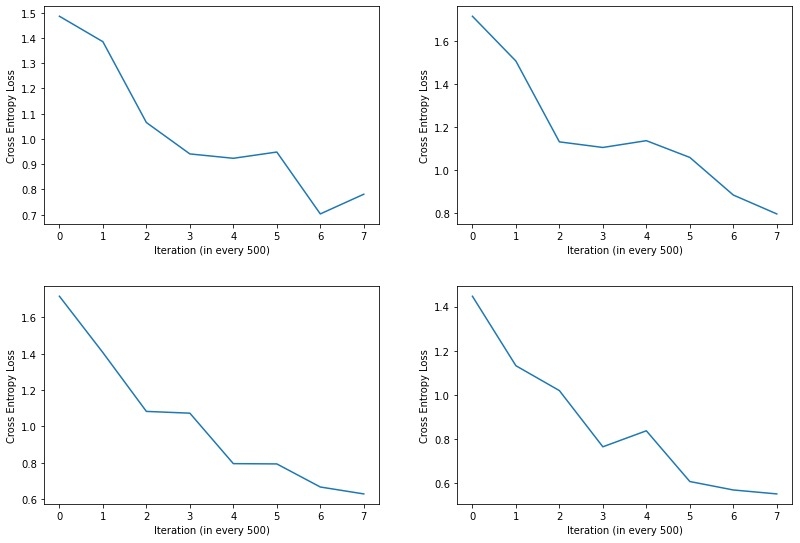